In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\customer_categorizer_project\data\marketing_campaign.csv",sep='\t')

In [3]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",100)

In [4]:
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# displaying Statistics-Summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'] ,format='%d-%m-%Y')

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# replacing missing values with Median 
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

In [12]:
#converting date column into tenure

df.insert(5, 'Customer_Tenure' , (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days)
df.drop(['Dt_Customer','ID'],inplace=True,axis=1)

In [13]:
categorical_feature = [columns for columns in df.columns if df[columns].dtypes =='object']
categorical_feature

['Education', 'Marital_Status']

In [14]:
numeric_feature = [columns for columns in df.columns if df[columns].dtypes != 'object']
numeric_feature

['Year_Birth',
 'Income',
 'Customer_Tenure',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace({
        'Absurd' : 'Others',
        'Alone'  : 'Others',
        'YOLO'   : 'Others'
})

df['Education'] = df['Education'].replace({
       '2n Cycle' : 'Undergraduate',
       'Basic'    : 'Others'
})

In [16]:
# values count for Categorical feature

print(df[categorical_feature[0]].value_counts())
print("---------------------------")
print(df[categorical_feature[1]].value_counts())

Education
Graduation       1127
PhD               486
Master            370
Undergraduate     203
Others             54
Name: count, dtype: int64
---------------------------
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Others        7
Name: count, dtype: int64


-------EDA -------

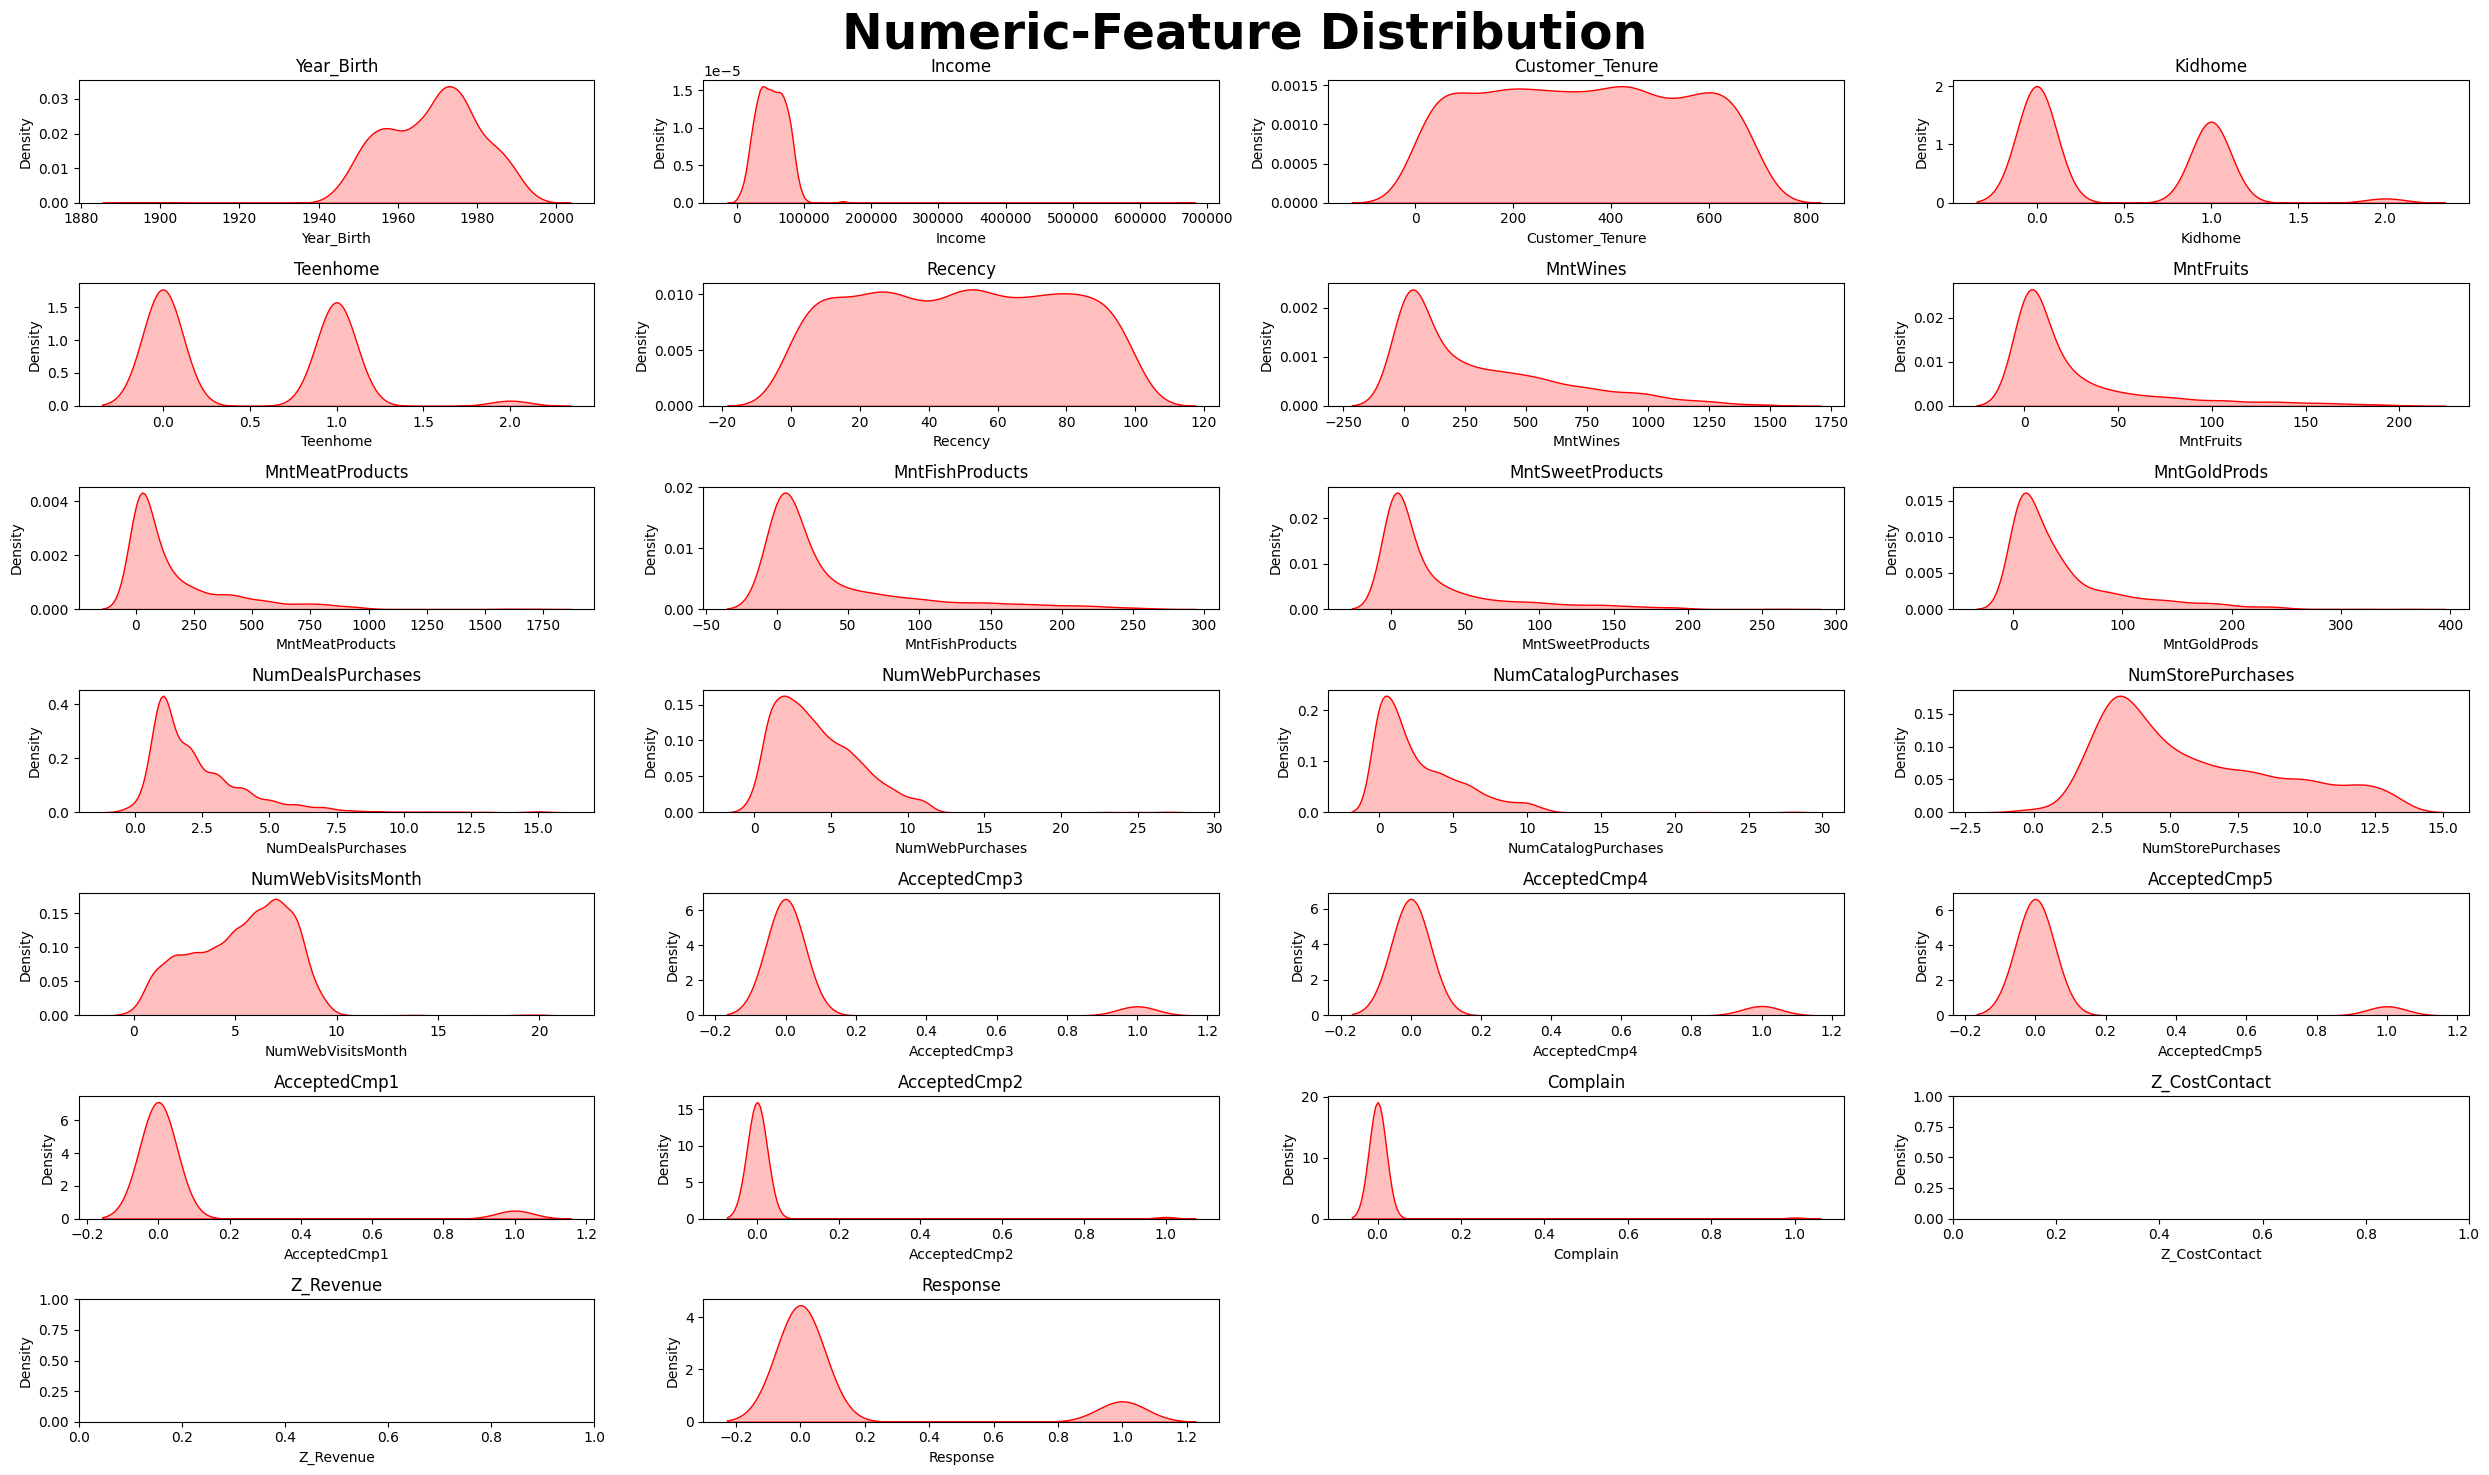

In [17]:
plt.figure(figsize=(25,15))

for i in range(len(numeric_feature)):
  plt.subplot(7,4,i+1)
  sns.kdeplot(df[numeric_feature[i]] ,fill=True ,color='red')
  plt.title(numeric_feature[i])

plt.suptitle("Numeric-Feature Distribution",fontsize=35,weight="bold")
plt.tight_layout()
plt.show()

------------------------------------------Insights ----------------------------------------


Year_Birth : The distribution is right-skewed.The values range between 1940 and 2000 and there appears to be an outlier at  lower end.
Income : The distribution is left-skewed. Mostly the values range between 0 to 1,00,000 but there are outliers at the higher end.
customer_tenure : The distribution is right-skewed, indicating most customers joined recently. A few customers have significantly longer tenures, possibly loyal ones.
kidhome/Teenhome : Most customers have either no kid or one, while only a few have two. The pattern is similar for Teenhome, with zero or one teen being the most common.
Recency : uniform-like distribution . customer have been contacted for various recency period.

MntWines: Right-skewed. A few customers spend heavily on wine; most spend modestly.
MntFruits: Right-skewed. Fruit spending is low for most; few spend more.
MntMeatProducts: Right-skewed. Most customers spend less, with a few high spenders.
MntFishProducts: Right-skewed. Similar trend — low spenders dominate.
MntSweetProducts: Right-skewed. Few customers show high sweet purchases.
MntGoldProds: Right-skewed. Most spend very little on gold products.

NumDealsPurchases: Right-skewed. Most made very few purchases with a discount.
NumWebPurchases: Right-skewed. Online purchases are limited for most customers.
NumCatalogPurchases: Strongly right-skewed. Majority made very few catalog orders.
NumStorePurchases: Slight right-skew. Most purchases are store-based but less frequent.
NumWebVisitsMonth: Peaks around 5 visits. Some heavy users, but many visit few times.

AcceptedCmp1–5: Highly imbalanced. Very few customers accepted the campaigns.
Response: Similar to campaign columns. Only a minority responded positively.

z_costContact/z_revenue : This two has no varinace and provide no information.



In [18]:
df.drop(['Z_CostContact','Z_Revenue'] ,axis=1 ,inplace=True)

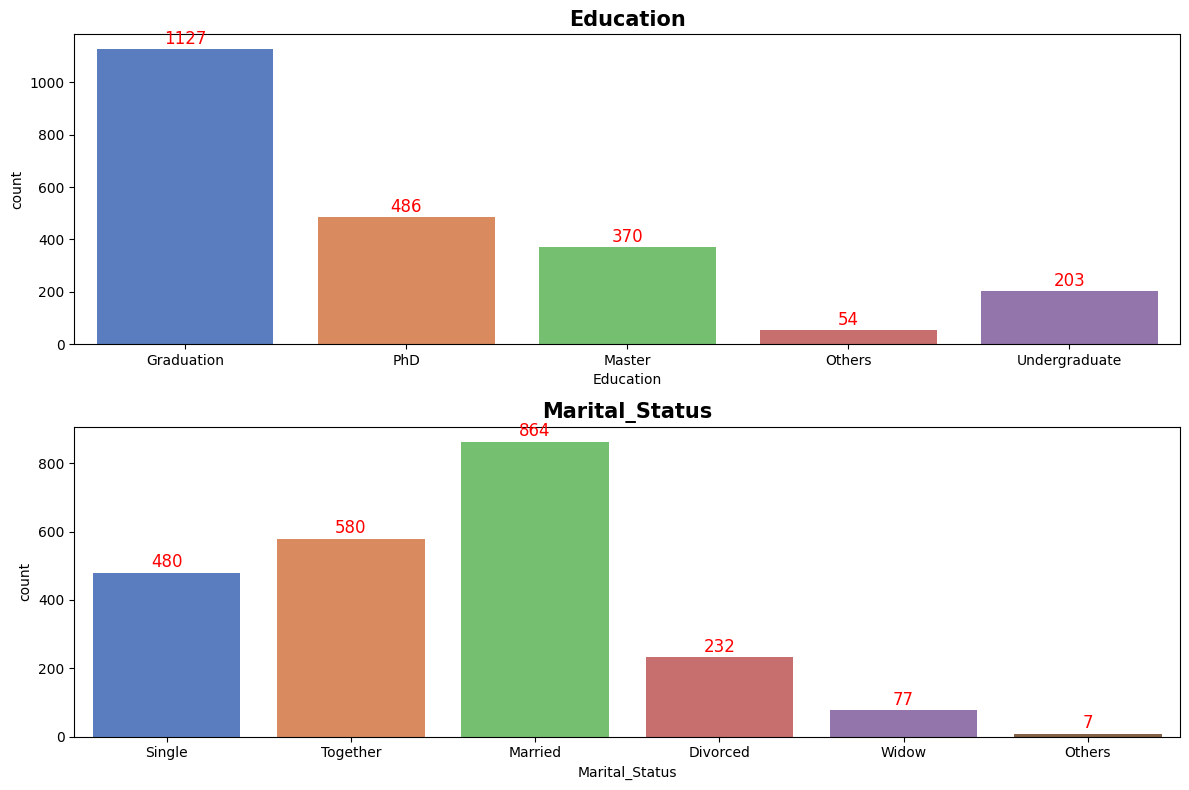

In [19]:
plt.figure(figsize=(12,8))

for idx in range(len(categorical_feature)):
    plt.subplot(2, 1, idx + 1)
    ax = sns.countplot(data=df, x=categorical_feature[idx], palette='muted')

    for bar in ax.patches:
        count = int(bar.get_height())
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(str(count), (x, y + 5), ha='center', va='bottom', fontsize=12, color='red')

    plt.title(categorical_feature[idx] ,weight="bold",fontsize=15)

plt.tight_layout()
plt.show()


---------------------------- Insights ---------------------

Education : Most customers are Graduate followed by Master's degree and Phd holders. Very few have others or basic eduaction
Marital_Status : Most customers are Married and Together very few are divorced , widow or others

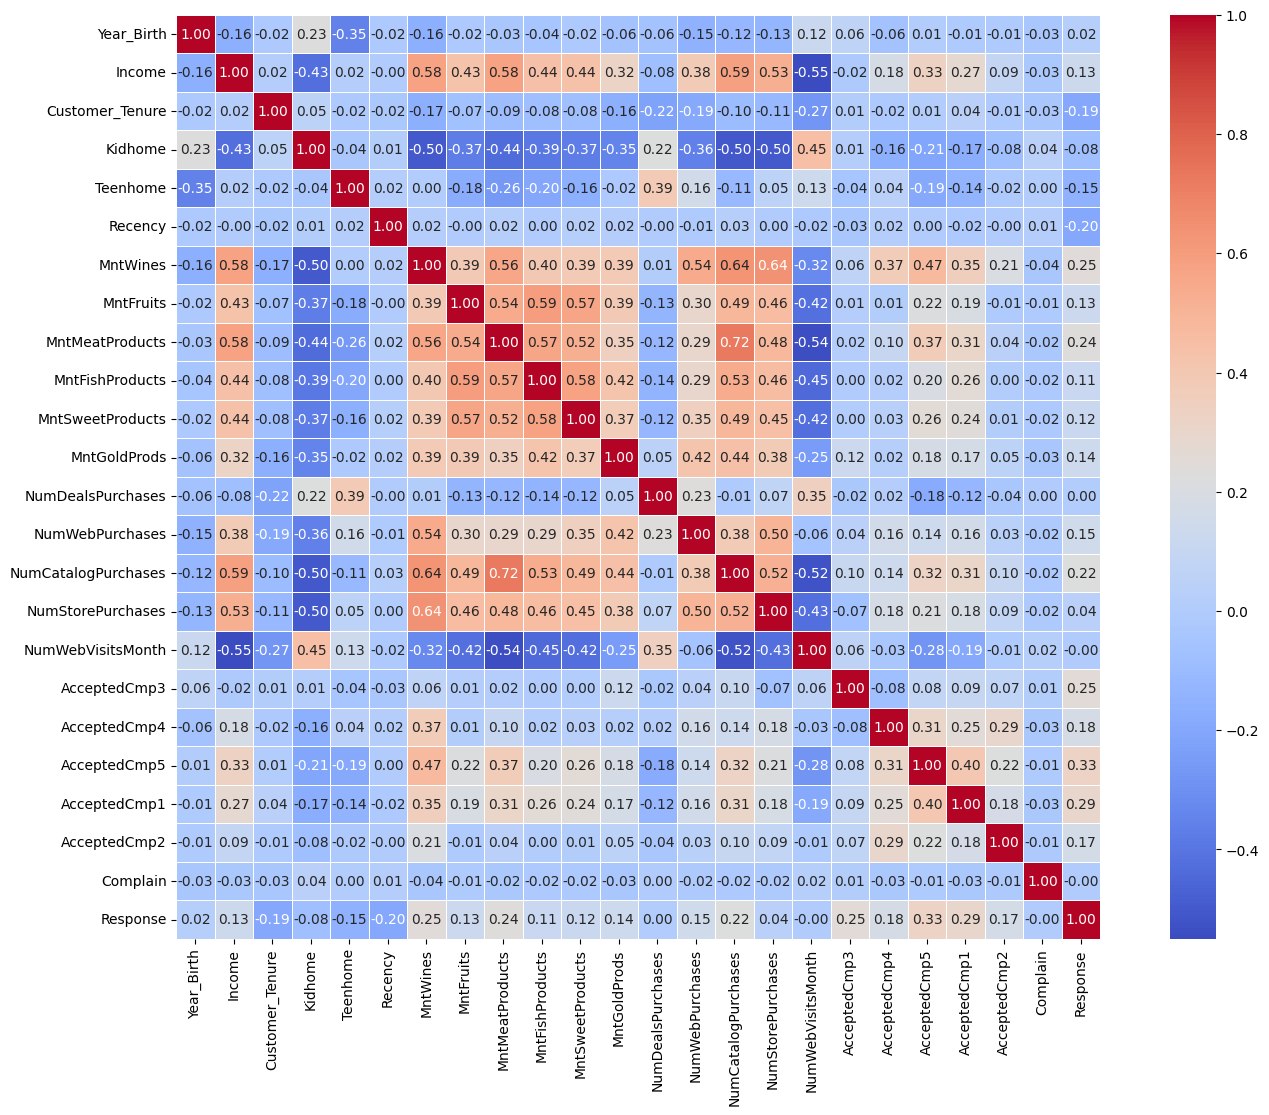

In [20]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(18,12))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',fmt=".2f",square=True,linewidths=0.5)
plt.show()

In [21]:
# This features has the lowest corr between them
corr.unstack().sort_values(ascending=True)

Income             NumWebVisitsMonth     -0.549785
NumWebVisitsMonth  Income                -0.549785
                   MntMeatProducts       -0.539470
MntMeatProducts    NumWebVisitsMonth     -0.539470
NumWebVisitsMonth  NumCatalogPurchases   -0.520364
                                            ...   
AcceptedCmp2       AcceptedCmp2           1.000000
Teenhome           Teenhome               1.000000
Recency            Recency                1.000000
Complain           Complain               1.000000
Income             Income                 1.000000
Length: 576, dtype: float64

In [22]:
raw_df = df.copy()

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OrdinalEncoder(
    categories=[['Others','Undergraduate','Graduation','Master','PhD']],
    dtype=int
)
df['Education'] = ordinal_encoder.fit_transform(df[['Education']]).astype(int)


ohe = OneHotEncoder(
    categories=[['Married','Together','Single','Divorced','Widow','Others']],
    sparse_output=False,
    dtype=int,
    handle_unknown='ignore',
    drop='first'
)

encoded = ohe.fit_transform(df[['Marital_Status']])
encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(['Marital_Status'])
)

df = pd.concat([df.drop(columns=['Marital_Status']), encoded_df], axis=1)


In [24]:
#making age feature through Year_Birth

df['Age'] = 2025 - df['Year_Birth']

In [25]:
# new children feature from Kidhome/Teenhome

df['Children'] = df['Kidhome'] + df['Teenhome']

In [26]:
# Total spends by a customer

df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

In [27]:
df['Total_Promo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [28]:
df.drop(['Year_Birth','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'] ,axis=1 ,inplace=True)

In [29]:
df.rename(columns={
    'MntFishProducts':'Fish',
    'MntFruits':'Fruits',
    'MntGoldProds':'Gold',
    'MntMeatProducts':'Meat',
    'MntSweetProducts':'Sweet',
    'MntWines':'Wines',
    'NumDealsPurchases':'Discount_Purchase',
    'NumCatalogPurchases':'Catalog',
    'NumStorePurchases':'Store_Purchase',
    'NumWebPurchases' : 'Web_Purchase',
    'NumWebVisitsMonth'	:'Website_Visit'},

    inplace=True)

In [30]:
df = df[['Education','Marital_Status_Together','Marital_Status_Single','Marital_Status_Divorced','Marital_Status_Widow','Marital_Status_Others','Age','Income','Children','Customer_Tenure','Recency','Wines','Fruits','Meat','Fish','Sweet','Gold','Discount_Purchase','Web_Purchase','Catalog','Store_Purchase','Website_Visit','Complain','Total_Promo']]

In [31]:
numeric_cols = [cols for cols in df.columns if df[cols].dtypes != 'object' ]
numeric_cols

['Education',
 'Marital_Status_Together',
 'Marital_Status_Single',
 'Marital_Status_Divorced',
 'Marital_Status_Widow',
 'Marital_Status_Others',
 'Age',
 'Income',
 'Children',
 'Customer_Tenure',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweet',
 'Gold',
 'Discount_Purchase',
 'Web_Purchase',
 'Catalog',
 'Store_Purchase',
 'Website_Visit',
 'Complain',
 'Total_Promo']

In [32]:
# Numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Continuous features (among numeric)
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 10]
continuous_features

['Age',
 'Income',
 'Customer_Tenure',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweet',
 'Gold',
 'Discount_Purchase',
 'Web_Purchase',
 'Catalog',
 'Store_Purchase',
 'Website_Visit']

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Get the actual DataFrame of continuous features
x = df[continuous_features]      
x = add_constant(x)                

# Calculate VIF
vif_df = pd.DataFrame()
vif_df['Feature'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display sorted VIF values
vif_df.sort_values(by="VIF", ascending=False)


,Feature,VIF
0,const,68.530628
13,Catalog,2.904230
7,Meat,2.757364
5,Wines,2.642362
15,Website_Visit,2.533032
14,Store_Purchase,2.263469
2,Income,2.125893
8,Fish,2.068554
6,Fruits,1.933450
9,Sweet,1.898322


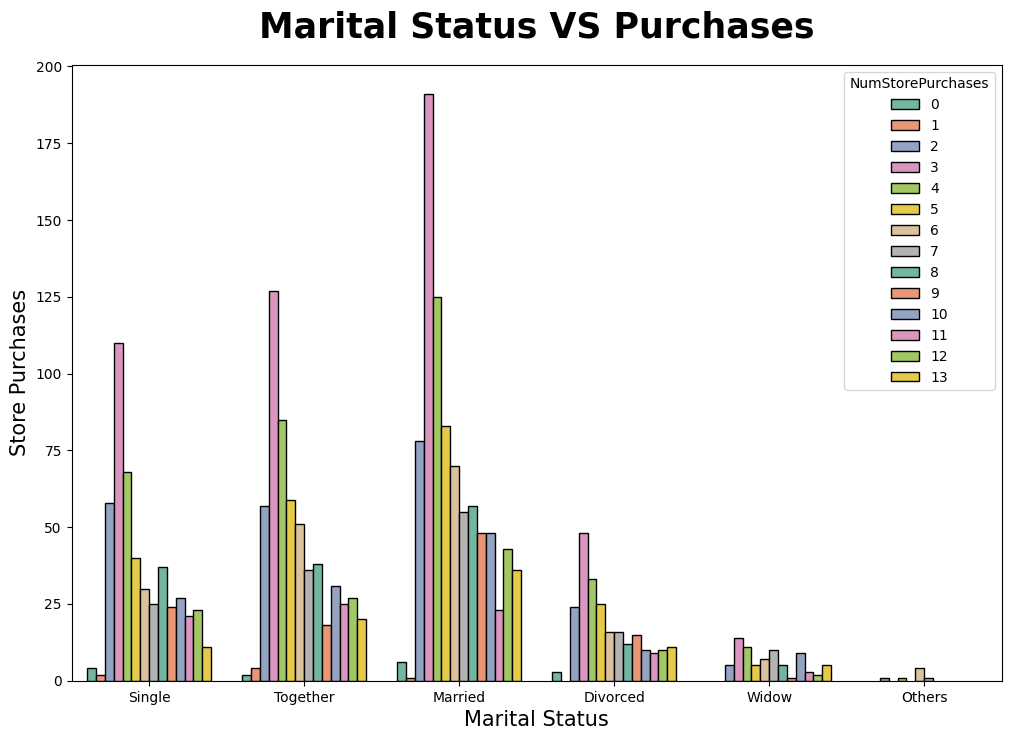

In [34]:
plt.figure(figsize=(12,8))

sns.countplot(data=raw_df,x='Marital_Status',hue='NumStorePurchases',ec='black',palette='Set2')
plt.title('Marital Status VS Purchases' ,weight='bold',fontsize=25,pad=20)
plt.xlabel('Marital Status' ,weight='light',fontsize=15)
plt.ylabel('Store Purchases', weight='light',fontsize=15)
plt.show()

Report:

* As per the chart , Married customer bought more store Products.
* Divorced ,Widow and Others bought very less store Products.
* The single marital status customers bought more Products then unmarried , Divorced , Widow.

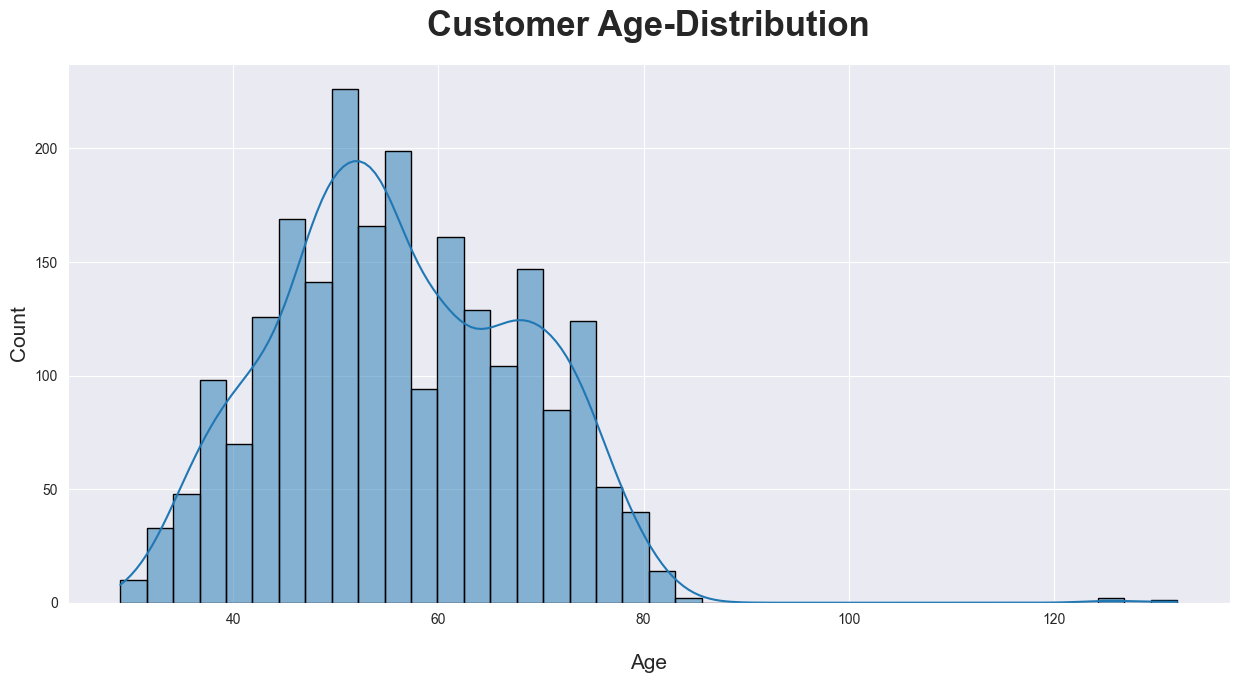

In [35]:
plt.figure(figsize=(15,7))

sns.set_style('darkgrid')
sns.histplot(data=df , x='Age', bins=40, kde=True ,fill=True, edgecolor='black')
plt.title('Customer Age-Distribution' ,weight='bold',fontsize=25,pad=20)
plt.xlabel('\nAge',weight='light',fontsize=15)
plt.ylabel('Count',weight='light',fontsize=15)
plt.show()

Report:

* As per the chart , the most of the customer Age range between 40-60.
* There are also some outliers present so we can remove it.
* So most of the customer Age is less then 80. so we can use filter Age <85.
* After filter this would follow Normal Distribution.


In [36]:
#Created this feature again for Income-Total_Spending Distribution

df['Total_Spending'] = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)


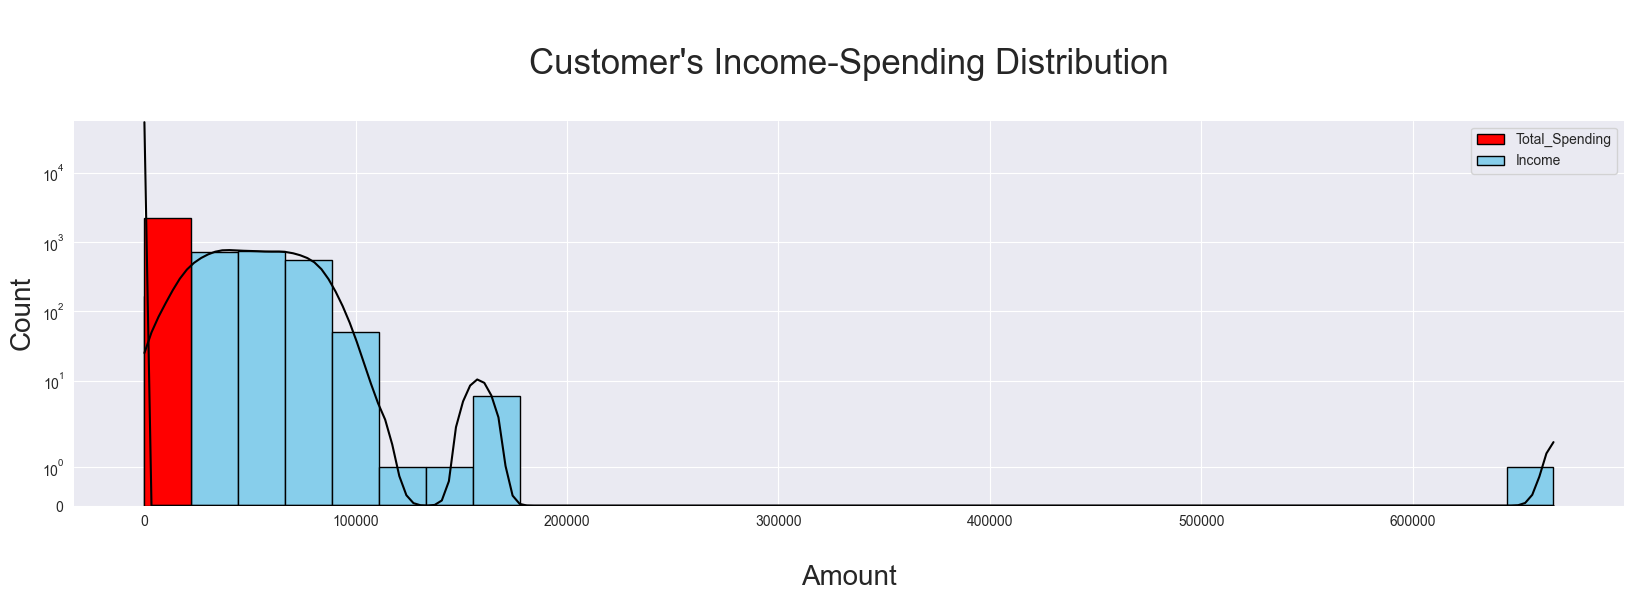

In [37]:
plt.subplots(figsize=(20, 5))
ax = sns.histplot(df[["Total_Spending","Income"]],palette=["red","skyblue"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
ax.axes.lines[0].set_color("black")
ax.axes.lines[1].set_color("black")
ax.axes.set_yscale("symlog")
ax.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


Report:

* As per the chart, there is Outlier Present after 6,00,000 . So we can remove it!

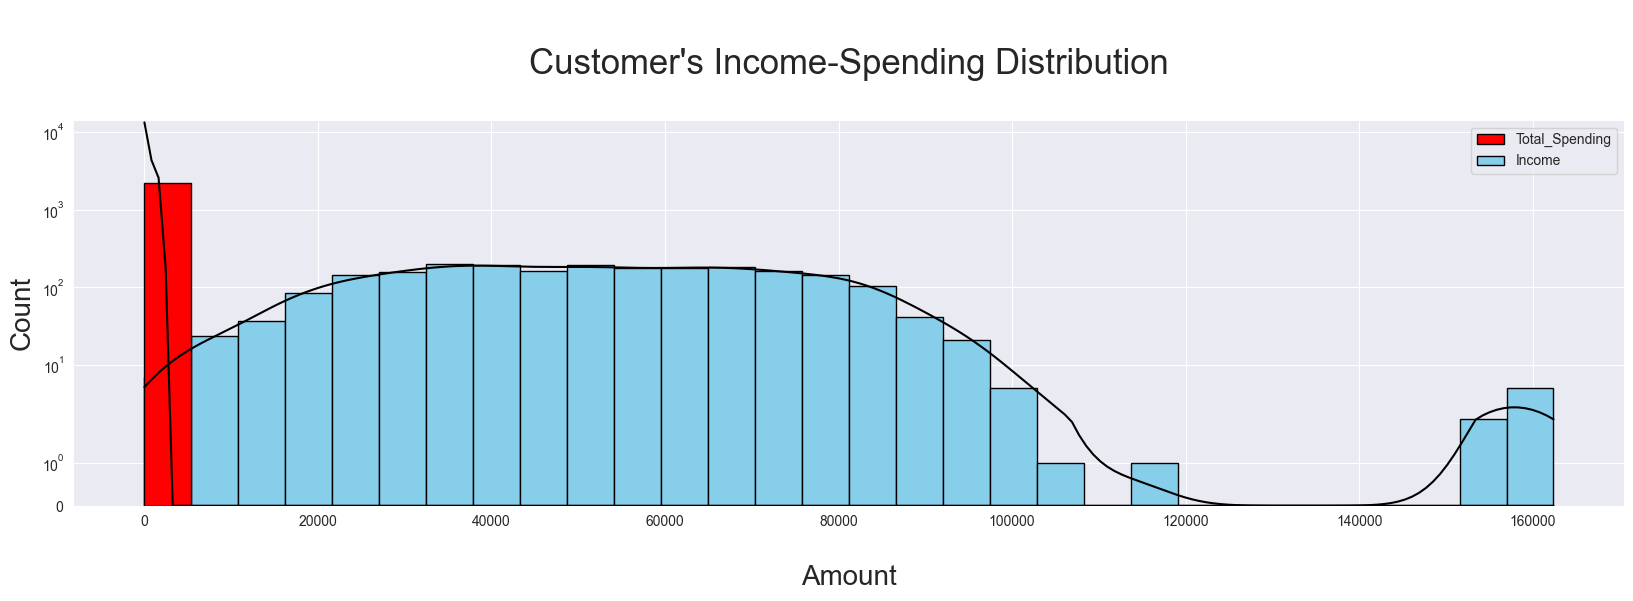

In [38]:
df = df[df['Income'] < 600000]

plt.subplots(figsize=(20, 5))
ax = sns.histplot(df[["Total_Spending","Income"]],palette=["red","skyblue"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
ax.axes.lines[0].set_color("black")
ax.axes.lines[1].set_color("black")
ax.axes.set_yscale("symlog")
ax.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Reports:

* Most of the customer Income range between 20000-80000.
* But almost  all customer spends very less of their Income.

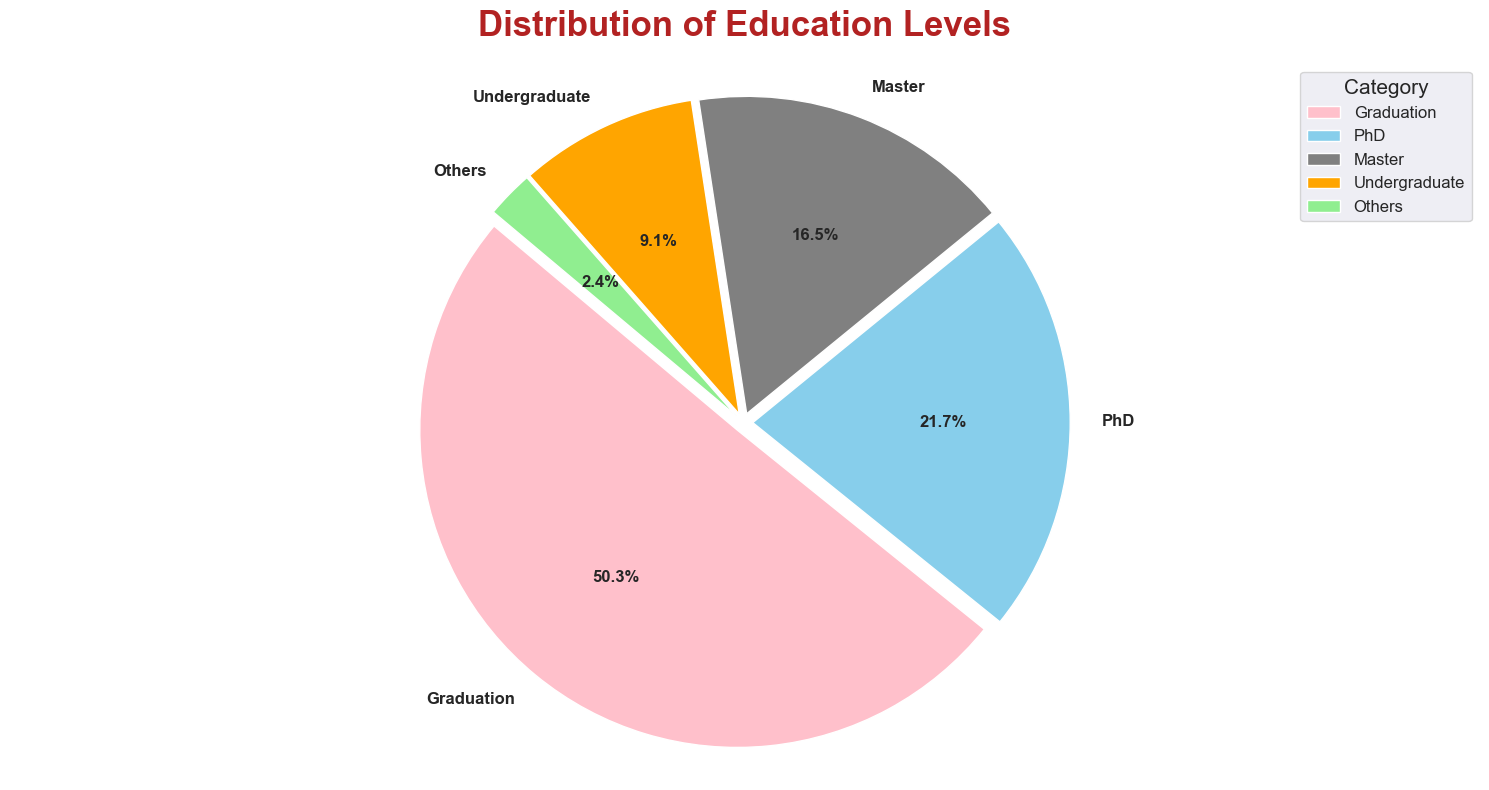

In [39]:
edu_counts = raw_df['Education'].value_counts()

# Create labels and values
labels = edu_counts.index
sizes = edu_counts.values

# Plot pie chart
plt.figure(figsize=(15, 8))
plt.pie(sizes, labels=labels, colors={'pink','skyblue','orange','grey','lightgreen'},
         autopct='%1.1f%%', startangle=140, explode=[0.03]*len(labels),
         wedgeprops={'edgecolor':'white'},textprops={'weight':'bold','fontsize':12})

plt.title("Distribution of Education Levels", weight='bold', fontsize=25, pad=20, color='firebrick')
plt.legend(title='Category', title_fontsize=15, fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()

Report:

* Most cutomers are Graduate around 50.3%.
* only 2.4% customers have  basic education, the lowest among all groups.

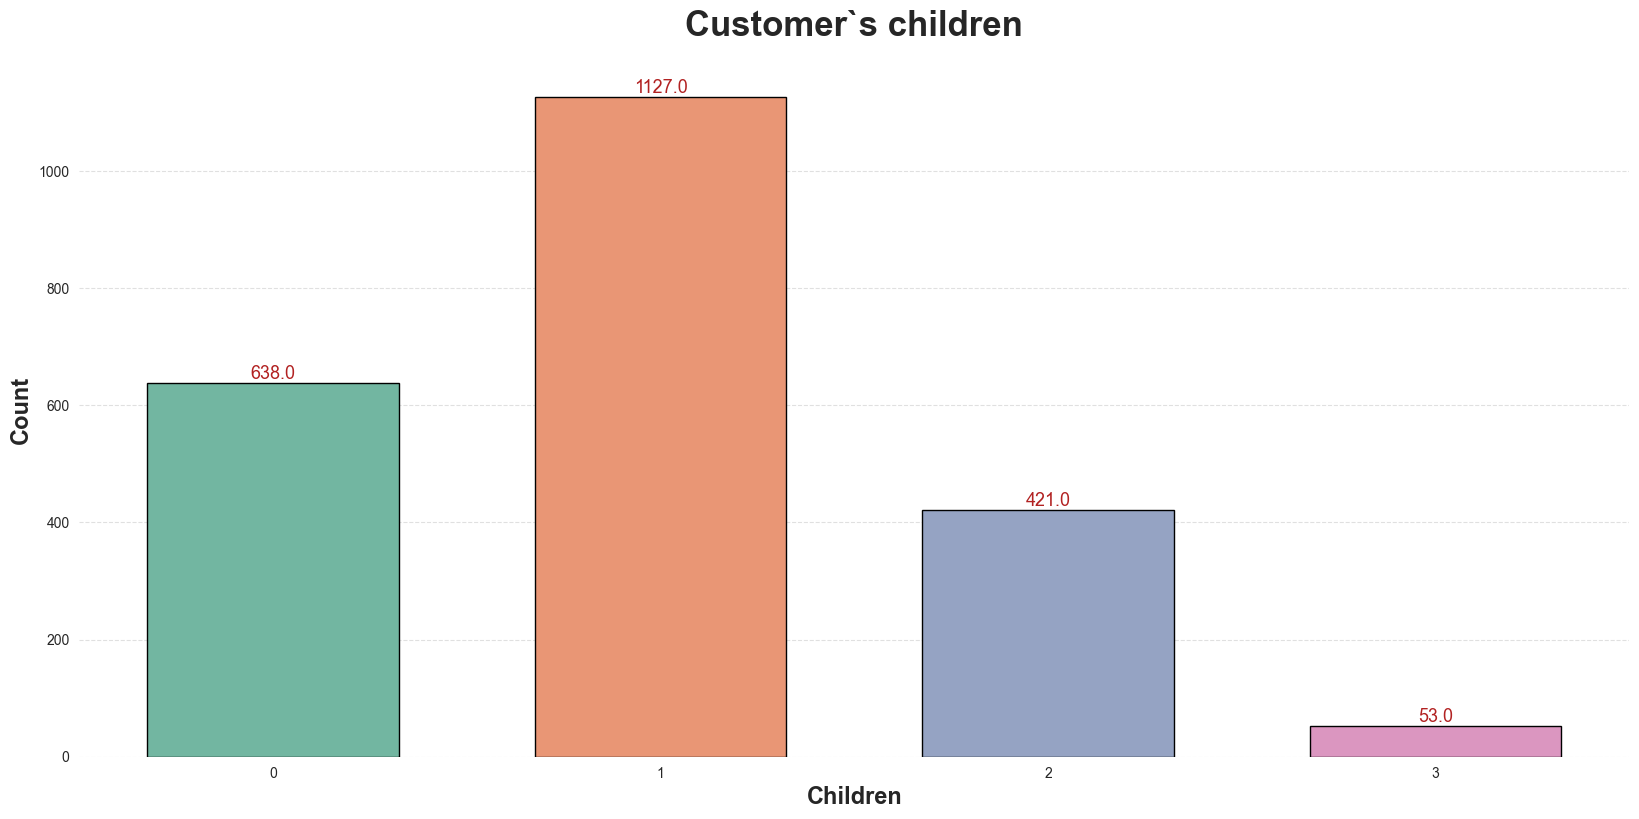

In [40]:
plt.figure(figsize=(20,9))

sns.set_style('whitegrid')
ax = sns.countplot(data=df, x='Children', edgecolor='black', palette='Set2', width=0.65)

plt.title('Customer`s children', weight='bold', fontsize=25, pad=20)
plt.xlabel('Children', weight='semibold', fontsize=17)
plt.ylabel('Count', weight='semibold', fontsize=17)

for bar in ax.patches:
      ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=13 ,color='firebrick')

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.show()

Reports:

* Most of the Customer have One child. To be precise 1127
* 638 Customers have no child at all.
* 421 Customers have 2 children.
* Very Less Customer have 3 children.

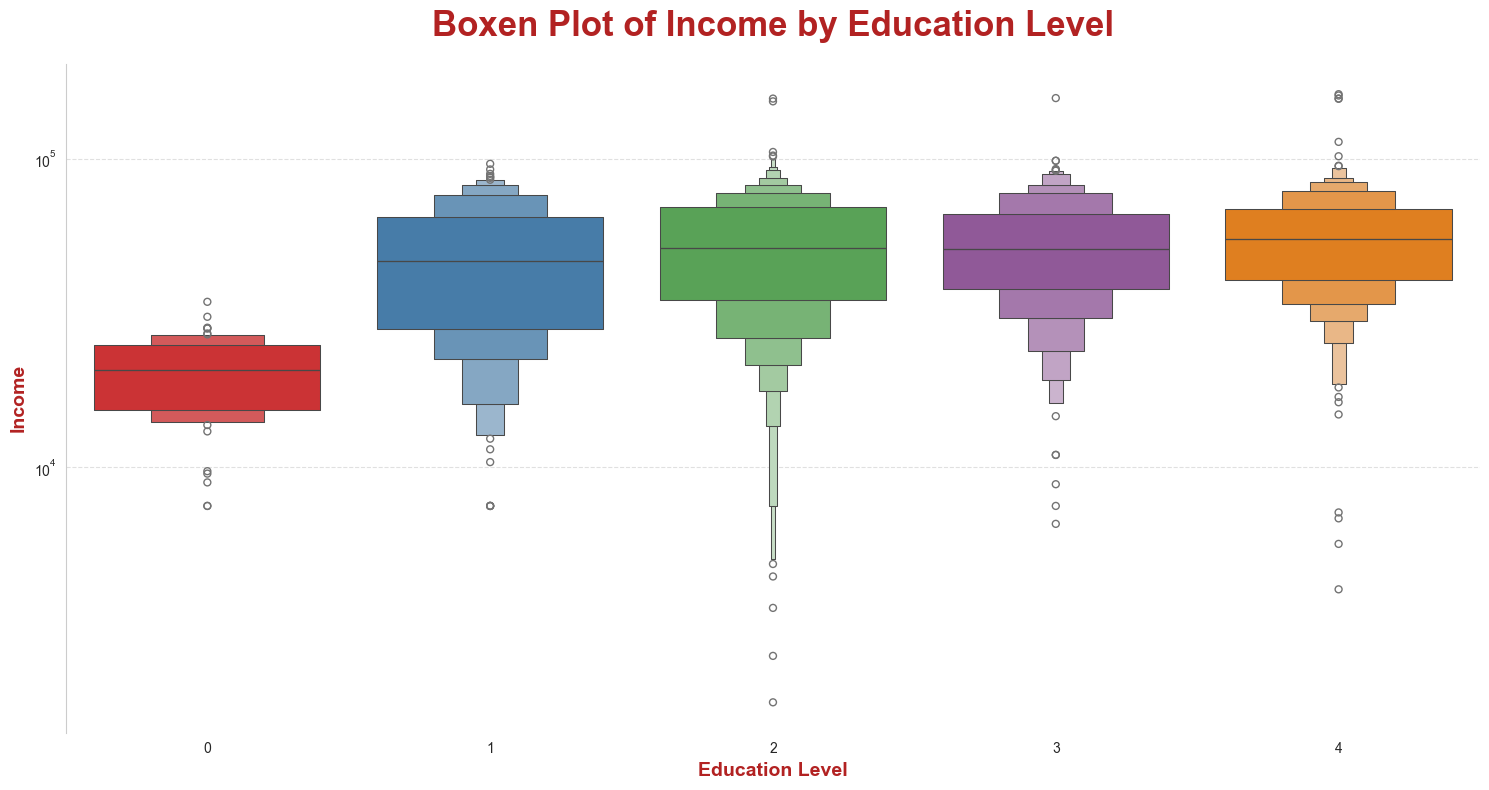

In [41]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")

ax = sns.boxenplot(data=df, x="Education", y="Income", palette="Set1")
ax.set_yscale('log')

plt.title("Boxen Plot of Income by Education Level", fontsize=25, weight='bold', pad=20, color='firebrick')
plt.xlabel("Education Level", fontsize=14, weight='semibold', color='firebrick')
plt.ylabel("Income", fontsize=14, weight='semibold', color='firebrick')

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
sns.despine(bottom=True)
plt.tight_layout()
plt.show()


Reports:

* As per the chart, Graduation has the widest Income.
* Phd and masters have Higher Central Incomes.
* Others have Consistently very low Income.
* UnderGraduate are more concentrated in mid-income.
* Also, Outliers are Present!

In [42]:
# saving as Pickel 
df.to_pickle('pipeline_ready_df.pkl')